In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
happy = pd.read_csv('./2015.csv')
happy.head(5)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [3]:
happy.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [4]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# conclusions1 : family effect in Happiness Score

In [5]:
X = happy['Family'].values.reshape(-1,1)
Y = happy['Happiness Score'].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

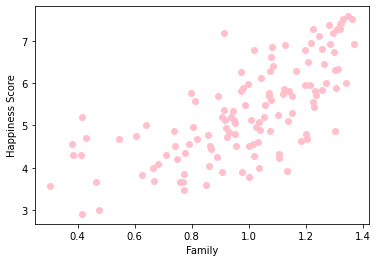

In [7]:
plt.scatter(x_train, y_train, color='pink')
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [9]:
y_predict = model.predict(x_test)
y_predict

array([6.16670718, 6.10596179, 5.35100143, 6.09014399, 6.26758115,
       4.34314577, 5.36224122, 6.62485496, 4.72349904, 5.40315911,
       6.01446484, 5.62984929, 5.74789867, 6.13863927, 5.89802565,
       5.65681216, 5.43406854, 5.93439711, 6.23730317, 3.31489431,
       6.21952788, 6.11322345, 4.99461165, 2.19767169, 5.22149125,
       2.63952809, 4.10483694, 6.25624664, 6.1769998 , 5.05283124,
       4.06698158, 4.7005143 ])

In [10]:
y_test

array([5.987, 7.226, 4.419, 6.983, 7.364, 4.633, 5.007, 7.561, 4.839,
       5.889, 6.485, 5.399, 6.67 , 6.574, 4.885, 5.098, 6.13 , 6.168,
       5.791, 3.34 , 5.848, 6.477, 5.124, 3.678, 5.984, 2.839, 4.512,
       6.867, 6.575, 5.268, 4.369, 3.956])

In [11]:
print(f'Testing Accuracy: {model.score(x_test, y_test)*100}%')

Testing Accuracy: 70.27081033802163%


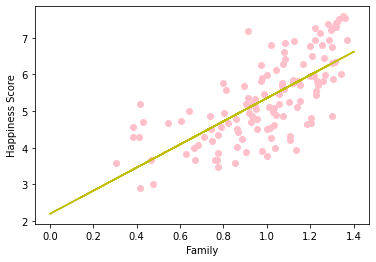

In [12]:
plt.scatter(x_train, y_train, color='pink')
plt.plot(x_test, y_predict, color='y')
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()

# conclusions2 : health effect in  Happiness Score

In [13]:
X = happy['Health (Life Expectancy)'].values.reshape(-1,1)
Y = happy['Happiness Score'].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

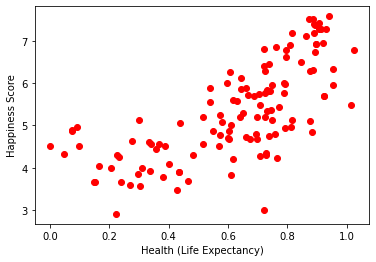

In [15]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_predict = model.predict(x_test)
y_predict

array([6.52507804, 6.10024814, 4.6523717 , 5.57018483, 6.26454341,
       4.61006405, 5.69496482, 6.38458286, 6.03271174, 5.31445567,
       5.94221946, 5.37832302, 6.09472834, 5.86309148, 5.47677031,
       5.6589887 , 5.50638242, 5.30331866, 5.83646656, 4.34310047,
       6.14278308, 5.54989145, 5.80357503, 3.52451389, 6.44153422,
       4.23052898, 4.73744159, 6.25986781, 6.37792663, 3.82673926,
       4.485349  , 4.48612827])

In [18]:
y_test

array([5.987, 7.226, 4.419, 6.983, 7.364, 4.633, 5.007, 7.561, 4.839,
       5.889, 6.485, 5.399, 6.67 , 6.574, 4.885, 5.098, 6.13 , 6.168,
       5.791, 3.34 , 5.848, 6.477, 5.124, 3.678, 5.984, 2.839, 4.512,
       6.867, 6.575, 5.268, 4.369, 3.956])

In [19]:
print(f'Testing Accuracy: {model.score(x_test, y_test)*100}%')


Testing Accuracy: 58.24988850720467%


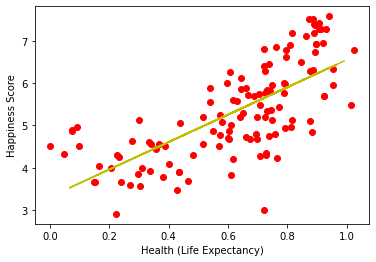

In [20]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict, color='y')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()

# conclusions3 :  Economy effect in Happiness Score

In [21]:
X = happy['Economy (GDP per Capita)'].values.reshape(-1,1)
Y = happy['Happiness Score'].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

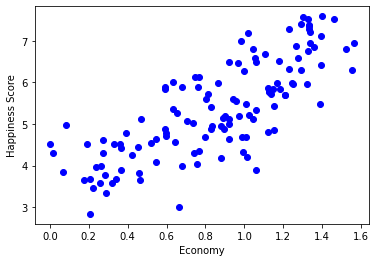

In [23]:
plt.scatter(x_train, y_train, color='blue')
plt.xlabel('Economy')
plt.ylabel('Happiness Score')
plt.show()

In [24]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [25]:
y_predict = model.predict(x_test)
y_predict

array([3.56126836, 7.2957167 , 3.43234477, 6.18171537, 6.19193239,
       3.88373879, 4.49090203, 3.57810454, 5.47318912, 5.89374757,
       5.17389726, 4.77031337, 4.31389155, 4.01222418, 6.68880715,
       5.76251765, 5.42923055, 6.4559144 , 4.26296789, 5.03930011,
       6.07218797, 5.32339328, 5.964275  , 5.84990432, 3.83173115,
       6.32779802, 6.00654995, 4.41241778, 5.77700137, 6.41331657,
       5.60139775, 6.28037997])

In [26]:
y_test

array([4.571, 6.611, 2.905, 6.302, 6.168, 3.931, 5.286, 3.678, 5.824,
       5.759, 5.253, 5.194, 4.694, 4.518, 6.901, 4.839, 4.739, 7.427,
       4.898, 4.867, 5.102, 4.271, 5.098, 6.786, 5.057, 5.987, 5.754,
       4.369, 5.813, 6.937, 7.226, 7.286])

In [27]:
print(f'Testing Accuracy: {model.score(x_test, y_test)*100}%')


Testing Accuracy: 60.67100918074901%


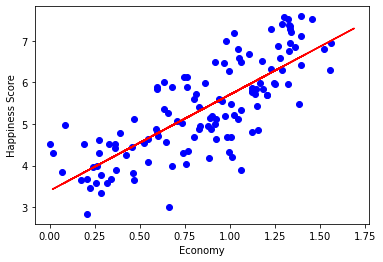

In [28]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_test, y_predict, color='red')
plt.xlabel('Economy')
plt.ylabel('Happiness Score')
plt.show()

##  the happiness score estimate the extent to which each of The following factorsâ€“ economic production, family, life expectancy, freedom, to making life evaluations higher in each country. The most important of these factors are family, health and the economy, and it is very important to be present in a person's life
